# (Ford GoBike System Data)
## by (Ahmed Said)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area :-
  - Each trip is anonymized and includes:
  - Trip Duration (seconds)
  - Start Time and Date
  - End Time and Date
  - Start Station ID
  - Start Station Name
  - Start Station Latitude
  - Start Station Longitude
  - End Station ID
  - End Station Name
  - End Station Latitude
  - End Station Longitude
  - Bike ID
  - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df_fb = pd.read_csv("201804-fordgobike-tripdata.csv")
df_fb.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,72393,2018-04-30 22:49:32.6180,2018-05-01 18:56:06.3010,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3940,Customer,No
1,81034,2018-04-30 17:46:04.9970,2018-05-01 16:16:39.2470,122,19th St at Mission St,37.760299,-122.418892,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,3374,Customer,No
2,86142,2018-04-30 16:07:13.9190,2018-05-01 16:02:56.7170,41,Golden Gate Ave at Polk St,37.781270,-122.418740,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3191,Subscriber,Yes
3,68839,2018-04-30 17:11:57.4640,2018-05-01 12:19:16.7870,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,115,Jackson Playground,37.765026,-122.398773,2970,Customer,No
4,59091,2018-04-30 18:45:21.5560,2018-05-01 11:10:13.5410,196,Grand Ave at Perkins St,37.808894,-122.256460,233,12th St at 4th Ave,37.795812,-122.255555,522,Customer,No


In [3]:
#Get Data Set Info  
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131169 entries, 0 to 131168
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             131169 non-null  int64  
 1   start_time               131169 non-null  object 
 2   end_time                 131169 non-null  object 
 3   start_station_id         131169 non-null  int64  
 4   start_station_name       131169 non-null  object 
 5   start_station_latitude   131169 non-null  float64
 6   start_station_longitude  131169 non-null  float64
 7   end_station_id           131169 non-null  int64  
 8   end_station_name         131169 non-null  object 
 9   end_station_latitude     131169 non-null  float64
 10  end_station_longitude    131169 non-null  float64
 11  bike_id                  131169 non-null  int64  
 12  user_type                131169 non-null  object 
 13  bike_share_for_all_trip  131169 non-null  object 
dtypes: f

In [4]:
#Check data set duplicates
df_fb.duplicated().sum()

0

- As we saw that we need to change the **start_time , end_time** from object to datetime and the **user_type , bike_share_for_all_trip** to category instead of object

In [5]:
#change columns to datetime and user_type to category 
df_fb[['start_time', 'end_time']] = df_fb[['start_time','end_time']].apply(pd.to_datetime,format='%Y-%m-%d %H:%M:%S.%f')
df_fb['user_type'] = df_fb['user_type'].astype('category')
df_fb['bike_share_for_all_trip'] = df_fb['bike_share_for_all_trip'].astype('category')

In [6]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131169 entries, 0 to 131168
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             131169 non-null  int64         
 1   start_time               131169 non-null  datetime64[ns]
 2   end_time                 131169 non-null  datetime64[ns]
 3   start_station_id         131169 non-null  int64         
 4   start_station_name       131169 non-null  object        
 5   start_station_latitude   131169 non-null  float64       
 6   start_station_longitude  131169 non-null  float64       
 7   end_station_id           131169 non-null  int64         
 8   end_station_name         131169 non-null  object        
 9   end_station_latitude     131169 non-null  float64       
 10  end_station_longitude    131169 non-null  float64       
 11  bike_id                  131169 non-null  int64         
 12  user_type       

In [7]:
#Check if we have any null values
df_fb.isnull().values.any()

False

In [8]:
#Get the data set shape
df_fb.shape

(131169, 14)

### What is the structure of your dataset?

> This dataset has **131168** rows and **14** columns

### What is/are the main feature(s) of interest in your dataset?

> We will work on the most important columns as i see **(user_type,start_time,end_time,duration_sec)** and as long as we work we will get more features

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that **duration_sec** and **user_type** will be very helpful to us

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Average duration in minutes 

In [9]:
# here we will convert the duration_sec to minutes to be easy to understand and visulaize
df_fb['duration_min'] = df_fb['duration_sec'] / 60

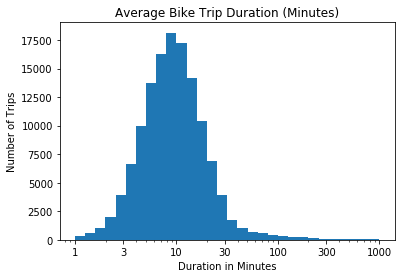

In [10]:
#we will make Log transformation to better understand the data
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_fb , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration in Minutes');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

- As we see in the graph that the trip duration is between (1 - 100) minutes and the most frequent value is 10 minutes

### Type of user 

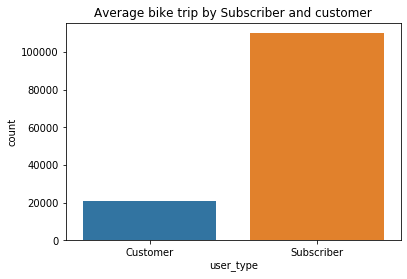

In [11]:
#Visulaize the count of user type if it is customer or subscriber
sb.countplot(data=df_fb,x='user_type')
plt.title('Average bike trip by Subscriber and customer');

- From the graph we discovered the most type of user types are subscribers

- Add two columns from start_time for month and hour

In [13]:
df_fb['Month'] = pd.DatetimeIndex(df_fb['start_time']).month
df_fb['Hour'] = pd.DatetimeIndex(df_fb['start_time']).hour

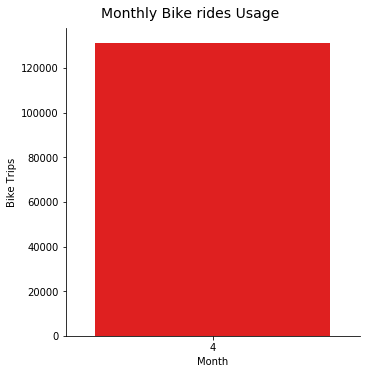

In [17]:
g = sb.catplot(data=df_fb, x='Month', kind='count', color='r')
g.set_axis_labels("Hour", "Bike Trips")
g.fig.suptitle('Monthly Bike rides Usage', y=1.03, fontsize=14);

- All the data we have in our data set is in **April** month

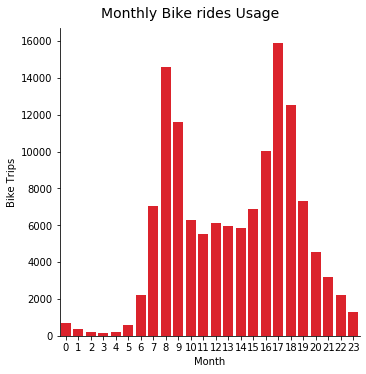

In [28]:
g = sb.catplot(data=df_fb, x='Hour', kind='count', color='#F90510')
g.set_axis_labels("Month", "Bike Trips")
g.fig.suptitle('Monthly Bike rides Usage', y=1.03, fontsize=14);

- The most frequent hours of start time in the day are **8 am** and **5 pm**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes , I have transformed Start_time and end_time to date time and changing the user_type and bike_share_for_all_trip to category


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No , I didn't

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Relation between Start Hour and User_Type

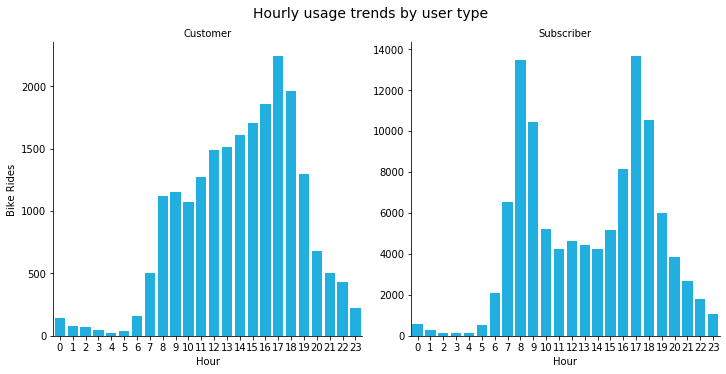

In [33]:
g = sb.catplot(data=df_fb, x='Hour', col="user_type", kind='count', sharey = False, color = 'deepskyblue')
g.set_axis_labels("Hour", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage trends by user type', y=1.03, fontsize=14);

- There are segnificant appear for both user types in the 5 pm Hr and the subscribers has segnificant appear at 8 am

### Relation between user type and the duration of the trip

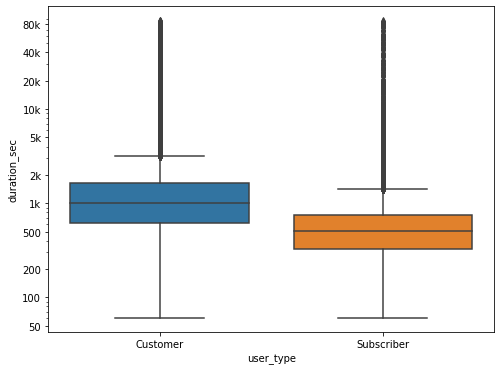

In [49]:
# let`s explore the relationship between duarion and user_type using boxplot 
plt.figure(figsize=[8,6])
sb.boxplot(data=df_fb, x='user_type', y='duration_sec')
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

- As we discovered here although we have the large amount of user types are subscribers but the average duration of customer types are higher than avarage duration of subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When we found the relation of user types and the period of the trip we found that although we have the large amount of user types are subscribers but the average duration of customer types are higher than avarage duration of subscribers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the relation of user types and start hour , the most frequent start hour for the subscribers are 8 am and 5 pm , and the most frequent hour for the customers are 5 pm

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Correlation between data set variables

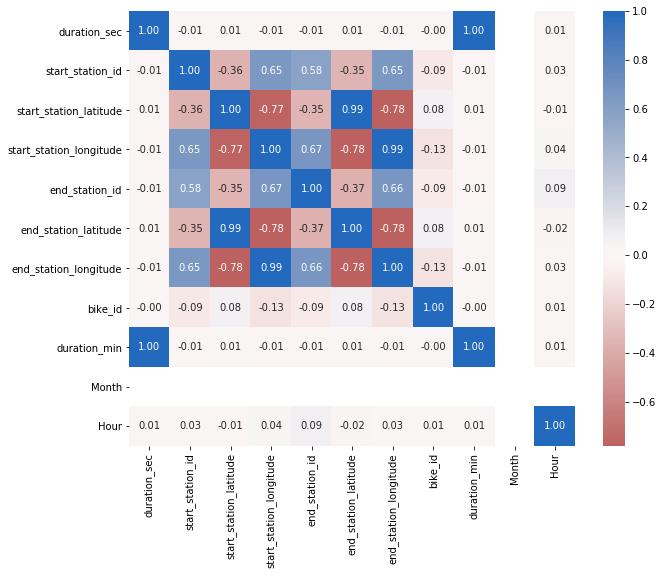

In [53]:
plt.figure(figsize=[10,8])
sb.heatmap(df_fb.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

> There are segnificant relationship between some features in the data set like (start_station_longitude, end_station_station_longitude) and (start_station_id, end_station_longitude) but we won't benefit from it with any thing

### Relation between start hour and trip duration and user type

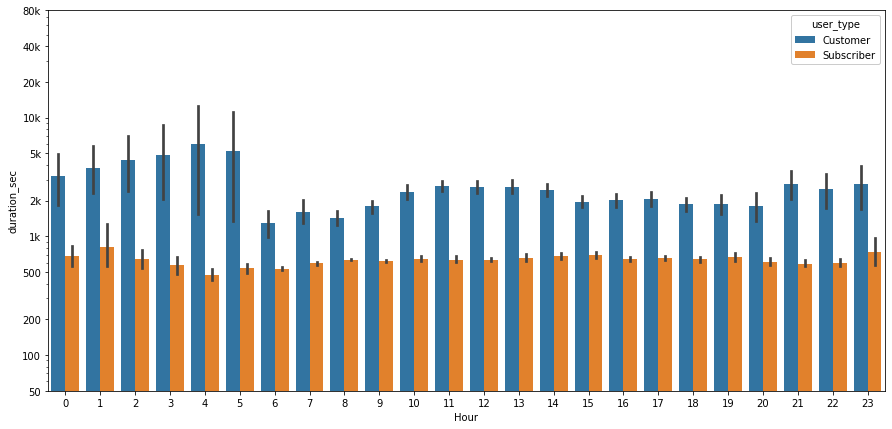

In [62]:
plt.figure(figsize=[15,7])
ax = sb.barplot(data = df_fb, x = 'Hour', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1, title = 'user_type')
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

> As Discovered from the graph
  - The user type of the customer has the longest duration trip at 4 am and 5 am
  - The user type of the subscriber has the longest duration trip at 1 am and 11 pm

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It seems that i didn't find the needed relation but in the relationship of duration of trip and start hours we find unpredictable hours in it we find that it has the longest duration of trips

### Were there any interesting or surprising interactions between features?

> Yes,when we visualize the triple relation it showed us that the longest duration of trips are in different and unpredictable hours as we mentioned above 